<a href="https://colab.research.google.com/github/mehraj-alom/ATV/blob/main/Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import zipfile
import os
import pandas as pd

# --- Configuration for your zip file ---
# Replace 'your_archive.zip' with the actual path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/datafile.zip'

# Define a directory to extract the files into within the Colab environment
extract_dir = '/content/unzipped_data'
os.makedirs(extract_dir, exist_ok=True)

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully unzipped '{zip_file_path}' to '{extract_dir}'")

    print("Contents of the unzipped directory:")
    for root, dirs, files in os.walk(extract_dir):
        for name in files:
            print(os.path.join(root, name))

    unzipped_csv_path = os.path.join(extract_dir, 'your_data.csv')

    if os.path.exists(unzipped_csv_path):
        df_unzipped = pd.read_csv(unzipped_csv_path)
        print(f"\nSuccessfully loaded '{unzipped_csv_path}'. Here are the first 5 rows:")
        display(df_unzipped.head())
    else:
        print(f"\nError: Could not find '{unzipped_csv_path}' in the unzipped directory. Please check the filenames.")

except FileNotFoundError:
    print(f"Error: The zip file '{zip_file_path}' was not found. Please check the path and filename in your Google Drive.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid zip file or is corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully unzipped '/content/drive/MyDrive/datafile.zip' to '/content/unzipped_data'
Contents of the unzipped directory:
/content/unzipped_data/data.yaml
/content/unzipped_data/README.roboflow.txt
/content/unzipped_data/README.dataset.txt
/content/unzipped_data/train/images/frame_1_1083_jpg.rf.cf6b098bbdc82e32e718519d80c39a68.jpg
/content/unzipped_data/train/images/hdetect2_mp4-0168_jpg.rf.b6fab65b5bf7bb24f74c9c75aaf16712.jpg
/content/unzipped_data/train/images/BikesHelmets176_png_jpg.rf.62bd28e6e850f54f32951a498e1e6290.jpg
/content/unzipped_data/train/images/frame_9_1735_jpg.rf.432ccafc69aaa6eccfa12e1738e05d6f.jpg
/content/unzipped_data/train/images/frame_7_1466_jpg.rf.ff9de77ee61ce6712bb8955fa3e313a3.jpg
/content/unzipped_data/train/images/352_jpg.rf.1f362c18ae0786eb5c61eee44ac51373.jpg
/content/unzipped_data/train/images/BikesHelmets687_png_jpg.rf.d4858a27c45a886ff500ec8623627076.jpg
/content/unzipped_data/train/images/frame_14_217_jpg.rf.83067b3ed4a828d43f9195c505e24160.jpg
/con

In [10]:
!pip install ultralytics


In [12]:
!yolo detect train \
  model=yolov8n.pt \
  data=/content/unzipped_data/data.yaml \
  epochs=100 \
  imgsz=640

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/unzipped_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

In [13]:
!yolo export model=/content/runs/detect/train5/weights/best.pt format=onnx

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 73 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 12 packages in 148ms
Prepared 4 packages in 1.35s
Installed 4 packages in 295ms
 + colorama==0.4.6
 + onnx==1.20.1
 + onnxruntime==1.24.1
 + onnxslim==0.1.84

requirements: AutoUpdate success ✅ 2.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.1 opset 22...
/usr/local/lib/pytho

In [14]:
import shutil
import os

output_zip_name = 'runs_output.zip'
source_dir = '/content/runs'

# Create a zip archive of the source directory
shutil.make_archive(output_zip_name.replace('.zip', ''), 'zip', source_dir)

print(f"Successfully created '{output_zip_name}' from '{source_dir}'")

Successfully created 'runs_output.zip' from '/content/runs'


In [39]:
from ultralytics import YOLO

onnx_model_path = '/content/runs/detect/train5/weights/best.pt'
model = YOLO(onnx_model_path)

print(f"Successfully loadmodel from: {onnx_model_path}")

Successfully loadmodel from: /content/runs/detect/train5/weights/best.pt


In [41]:
from ultralytics import YOLO

input_image_path = "/content/security-in-delhi-071435852-3x4.jpeg"

results = model.predict(source=input_image_path, conf=0.25, iou=0.7, save=True)

print("Prediction results saved to:")
for r in results:
    print(r.save_dir)


image 1/1 /content/security-in-delhi-071435852-3x4.jpeg: 640x480 2 bikes, 7 helmets, 1 number-plate, 6.7ms
Speed: 2.6ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict6
Prediction results saved to:
/content/runs/detect/predict6


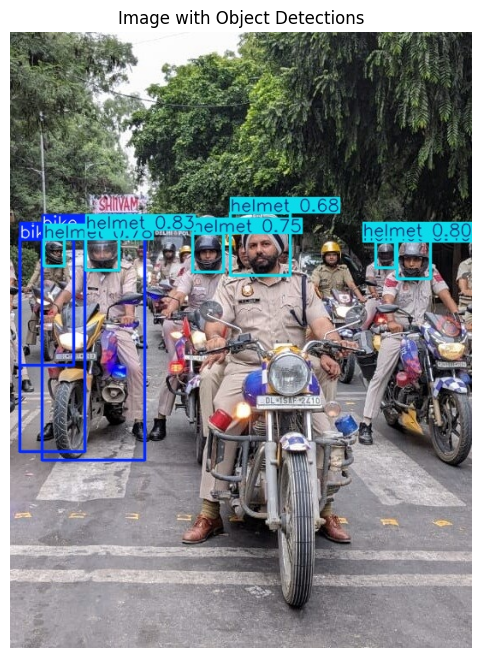

Annotated image displayed successfully.


In [38]:
import matplotlib.pyplot as plt
import cv2
import os

saved_image_dir = results[0].save_dir

base_name_without_ext = os.path.splitext(os.path.basename(input_image_path))[0]
actual_image_filename = base_name_without_ext + ".jpg" # Assuming YOLO saves as .jpg
annotated_image_path = os.path.join(saved_image_dir, actual_image_filename)

image_bgr = cv2.imread(annotated_image_path)

if image_bgr is None:
    print(f"Error: Could not load image from {annotated_image_path}. Please check the path and file integrity.")
else:
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)

    plt.title('Image with Object Detections')

    plt.axis('off')

    plt.show()
    print("Annotated image displayed successfully.")